# Principle Component Analysis(PCA)
PCA can be used for:<br>
    * Feature extraction<br>
    * Feature dimension reduction<br>
    * Stock market prediction<br>
    * Gene data analysis<br>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

## Import and Prepare data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

iris_df = pd.DataFrame(data, columns = feature_names)
iris_df["class"] = iris.target
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


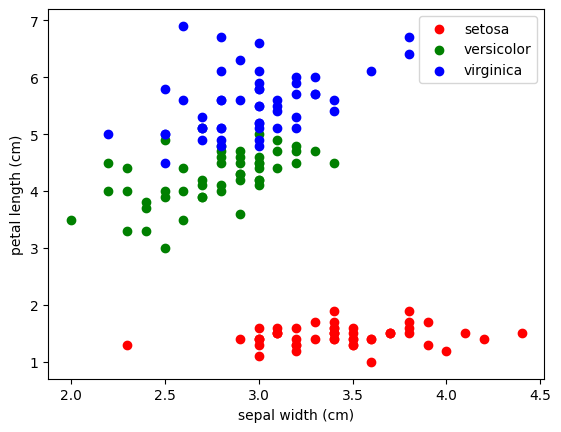

In [4]:
color_list = ["red", "green", "blue"]
for each in range(3):
    plt.scatter(iris_df[iris_df["class"] == each]["sepal width (cm)"], iris_df[iris_df["class"] == each]["petal length (cm)"], color = color_list[each], label = iris.target_names[each])

plt.xlabel("sepal width (cm)")
plt.ylabel("petal length (cm)")    
plt.legend()
plt.show()

## PCA Algorithm

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten = True) # n_components is the number of features after reduction and whiten normalizes data.

In [6]:
pca.fit(data)
data_pca = pca.transform(data)

print("Variance ratio: ", pca.explained_variance_ratio_) # variance ratio values of principal components 1 and 2

Variance ratio:  [0.92461872 0.05306648]


In [7]:
print("Sum of variance ratio values: ", sum(pca.explained_variance_ratio_)) # It shows how much data lost during feature reduction

Sum of variance ratio values:  0.977685206318795


## 2D Visualization After PCA

In [8]:
iris_df["p1"] = data_pca[:, 0]
iris_df["p2"] = data_pca[:, 1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,p1,p2
0,5.1,3.5,1.4,0.2,0,-1.305338,0.648369
1,4.9,3.0,1.4,0.2,0,-1.319935,-0.359309
2,4.7,3.2,1.3,0.2,0,-1.404967,-0.294244
3,4.6,3.1,1.5,0.2,0,-1.335109,-0.646140
4,5.0,3.6,1.4,0.2,0,-1.327023,0.663304


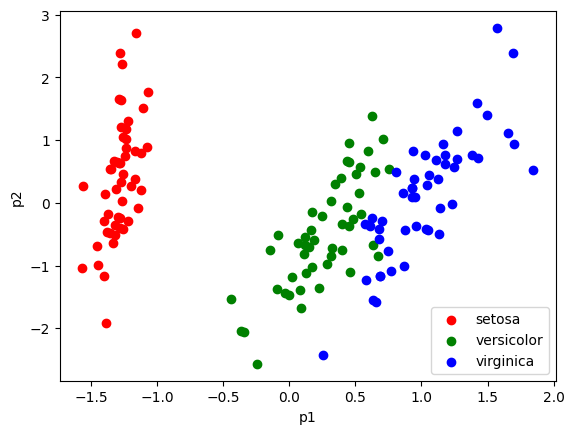

In [9]:
for each in range(3):
    plt.scatter(iris_df.p1[iris_df["class"] == each], iris_df.p2[iris_df["class"] == each], color = color_list[each], label = iris.target_names[each])

plt.xlabel("p1")
plt.ylabel("p2")
plt.legend()
plt.show()